In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.4MB/s 


DATA PROCESSING

In [ ]:

import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
# For the sake of efficiency, here we will use the clipped geoTIFF created previously
image_file = "/content/14JUL19225337-M3DS-013930604020_01_P001.TIF"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)

In [ ]:

# scale values for display purposes
def scale(band):
    return band / 10000.0

# Load the bands into numpy arrays
# recall that we previously learned PlanetScope band order is BGRN
blue = scale(satdat.read(1))
green = scale(satdat.read(2))
red = scale(satdat.read(3))
nir = scale(satdat.read(4))

In [ ]:
# Use numpy to create two stacks of bands:
import numpy
rgb = numpy.dstack((red, green, blue))
nrg = numpy.dstack((nir, red, green))

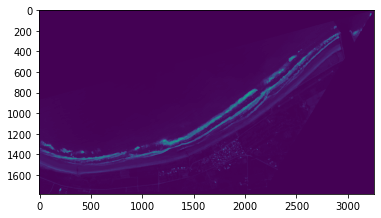

In [ ]:
# Use imshow to load the blue band.
fig = plt.imshow(blue)

# Display the results.
plt.show()

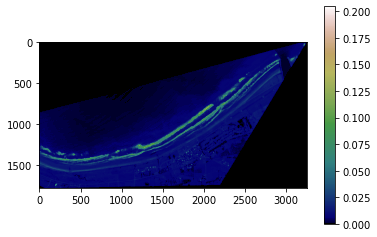

In [ ]:
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
fig = plt.imshow(green)
fig.set_cmap('gist_earth')
plt.colorbar()

# Display the results.
plt.show()

Composite Imagery

In [ ]:
# Use numpy to create two stacks of bands:
import numpy
rgb = numpy.dstack((red, green, blue))
nrg = numpy.dstack((nir,red,green))

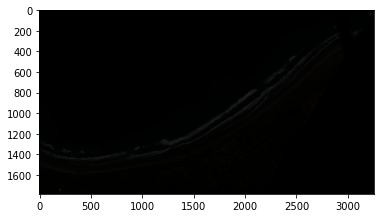

In [ ]:
# plot the RGB stack to see a true-color representation
plt.imshow(rgb)

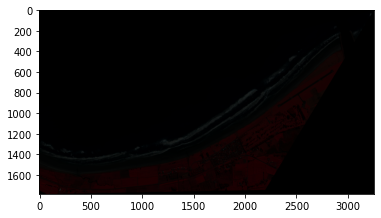

In [ ]:
# use the NRG stack to display a false-color composite, highlighting vegetation
# in clipped.tif, the grassy Presidio and Golden Gate Park become easy to spot
plt.imshow(nrg)

# Histogram


In [ ]:
import rasterio
import numpy
import math
from matplotlib import pyplot as plt


In [ ]:
blue, green, red, nir = satdat.read()

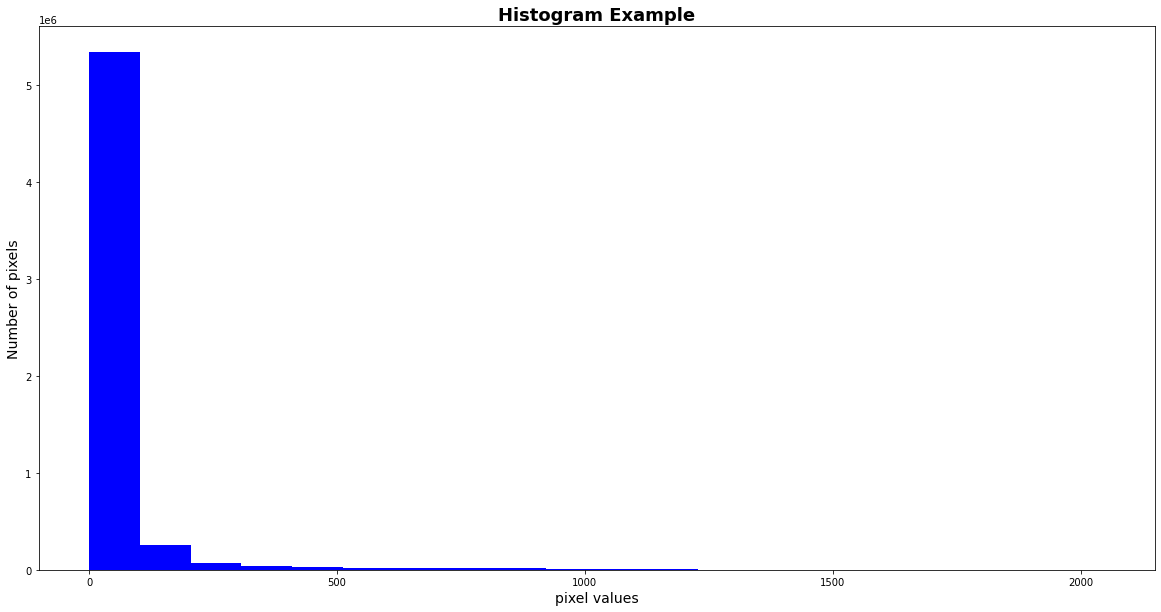

In [ ]:
# Define a new figure
fig2 = plt.figure(figsize=(20,10))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null blue band values as an example
# For the x-axis, we want to count every pixel that has a value
x = blue[numpy.not_equal(blue, satdat.nodata)]

# Define the number of bins to divide the data into
bins = 20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'blue'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.show()

# Classification: Model One 12MAR28


In [ ]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('/content/12MAR28224220-M3DS-013930604020_01_P002.TIF', gdal.GA_ReadOnly)

band = img_ds.GetRasterBand(2)

img = band.ReadAsArray()
print (img.shape)

X = img.reshape((-1,1))
print (X.shape)


(1785, 4312)
(7696920, 1)


In [ ]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

print (len(X_cluster))

1785


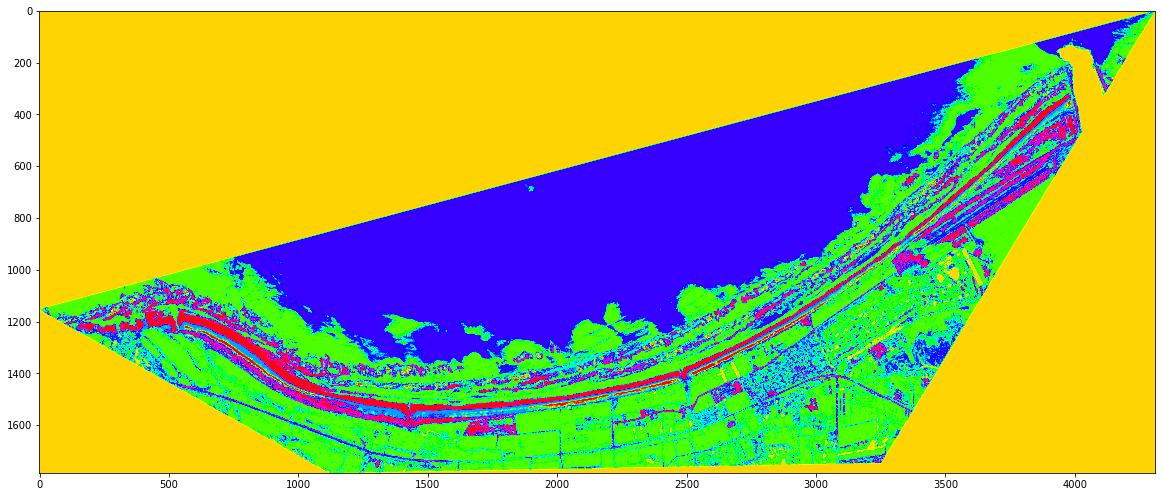

In [ ]:
%matplotlib inline  

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

In [ ]:
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

In [ ]:
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print (img.shape)

print (new_shape)


X = img[:, :, :13].reshape(new_shape)

print (X.shape)

In [ ]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)

In [ ]:
%matplotlib inline  

import matplotlib.pyplot as plt
print(X_cluster.shape)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

In [ ]:
MB_KMeans = cluster.MiniBatchKMeans(n_clusters=8)
MB_KMeans.fit(X)

X_cluster = MB_KMeans.labels_


X_cluster = X_cluster.reshape(img[:,:,0].shape)

In [ ]:

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

# Classification: Model Two 14JUL19

In [ ]:
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('/content/14JUL19225337-M3DS-013930604020_01_P001.TIF', gdal.GA_ReadOnly)

band = img_ds.GetRasterBand(2)

img = band.ReadAsArray()
print (img.shape)

X = img.reshape((-1,1))
print (X.shape)


(1785, 3257)
(5813745, 1)


In [ ]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

print (len(X_cluster))

1785


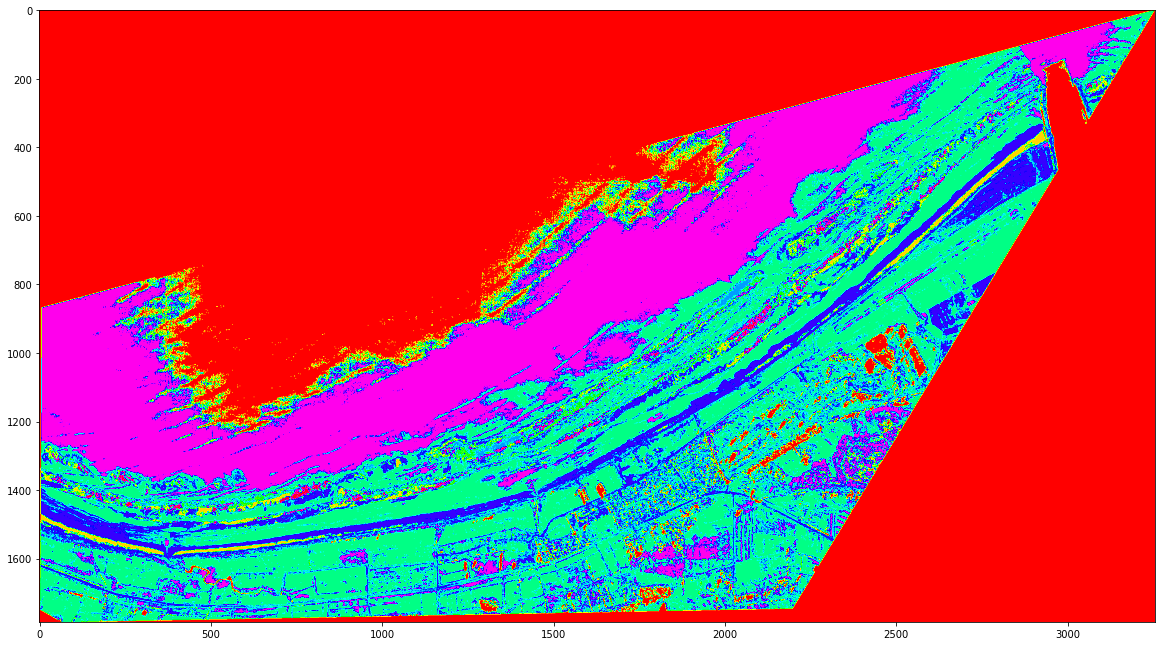

In [ ]:
%matplotlib inline  

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

In [ ]:
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

In [ ]:
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print (img.shape)

print (new_shape)


X = img[:, :, :13].reshape(new_shape)

print (X.shape)

(1785, 3257, 4)
(5813745, 4)
(5813745, 4)


In [ ]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)

(1785, 3257)


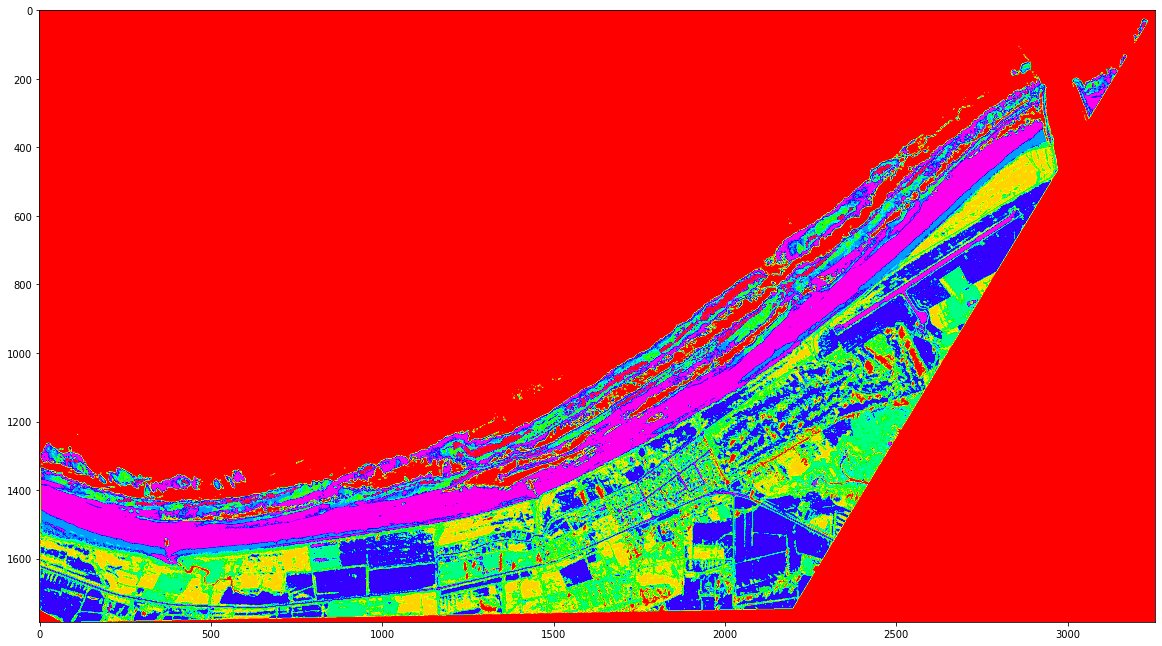

In [ ]:
%matplotlib inline  

import matplotlib.pyplot as plt
print(X_cluster.shape)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

In [ ]:
MB_KMeans = cluster.MiniBatchKMeans(n_clusters=8)
MB_KMeans.fit(X)

X_cluster = MB_KMeans.labels_


X_cluster = X_cluster.reshape(img[:,:,0].shape)

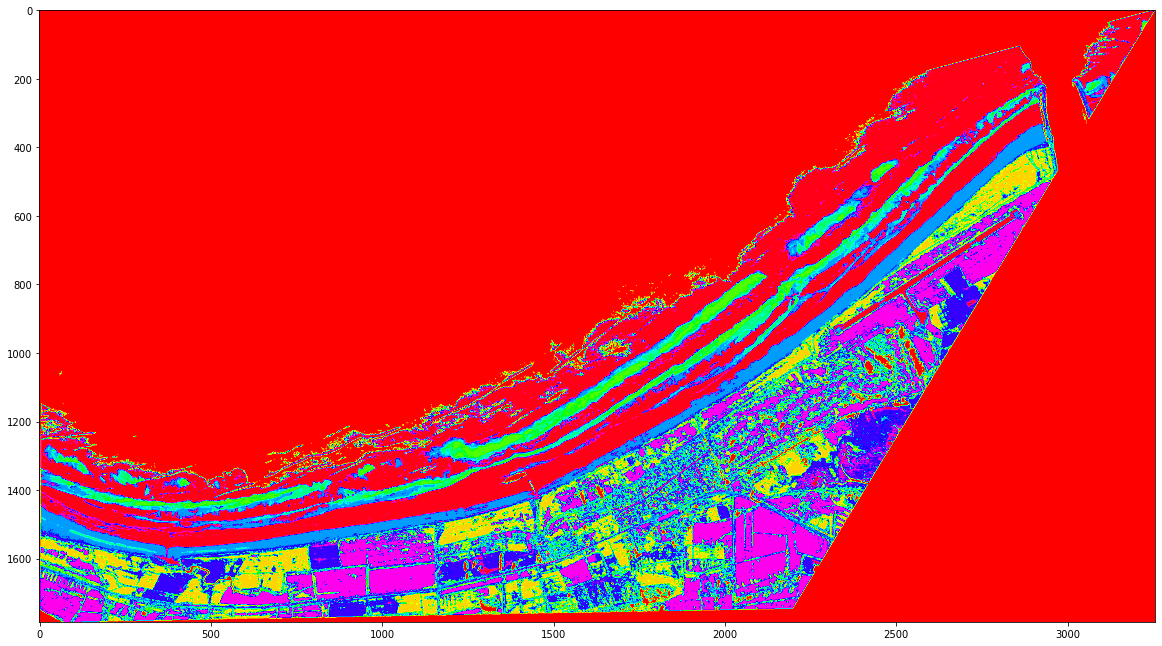

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()